# Set up paths

In [1]:
# Specify the lib path
lib_path<-paste(getwd(),'/hana_reanalysis_lib_r42',sep='')
print(lib_path)

# Set the path
.libPaths(lib_path)
.libPaths()

#Set the vis device
setHook(packageEvent("grDevices", "onLoad"),
function(...) grDevices::X11.options(type='cairo'))
options(device='x11')

[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"


[1] "/v-data2/matt_davenport/HaNa_RE/HaNa_Reanalysis/hana_reanalysis_lib_r42"
[2] "/home/mdavenport/bin/R4.2.1/R-4.2.1/library"

# 2 - Model Selection and Cleaning

## Goal is to just to visualize each of our generated gene networks to select to one we feel best about for statistical testing. 


## Intro stuff

In [2]:
library(tidyverse)
library(WGCNA)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




In [3]:
#REad in the nets
nets <- readRDS('1_wgcna_recut_nets_r42.rds')
names(nets)

[1] "10_0.2_1"   "25_0.2_1"   "50_0.2_1"   "100_0.2_1"  "250_0.2_1" 
 [6] "10_0.4_1"   "25_0.4_1"   "50_0.4_1"   "100_0.4_1"  "250_0.4_1" 
[11] "10_0.6_1"   "25_0.6_1"   "50_0.6_1"   "100_0.6_1"  "250_0.6_1" 
[16] "10_0.8_1"   "25_0.8_1"   "50_0.8_1"   "100_0.8_1"  "250_0.8_1" 
[21] "10_0.9_1"   "25_0.9_1"   "50_0.9_1"   "100_0.9_1"  "250_0.9_1" 
[26] "10_0.95_1"  "25_0.95_1"  "50_0.95_1"  "100_0.95_1" "250_0.95_1"
[31] "10_0.2_0"   "25_0.2_0"   "50_0.2_0"   "100_0.2_0"  "250_0.2_0" 
[36] "10_0.4_0"   "25_0.4_0"   "50_0.4_0"   "100_0.4_0"  "250_0.4_0" 
[41] "10_0.6_0"   "25_0.6_0"   "50_0.6_0"   "100_0.6_0"  "250_0.6_0" 
[46] "10_0.8_0"   "25_0.8_0"   "50_0.8_0"   "100_0.8_0"  "250_0.8_0" 
[51] "10_0.9_0"   "25_0.9_0"   "50_0.9_0"   "100_0.9_0"  "250_0.9_0" 
[56] "10_0.95_0"  "25_0.95_0"  "50_0.95_0"  "100_0.95_0" "250_0.95_0"
[61] "input_data"

In [4]:
#Get input data out of the list
input_data      <- nets$input_data
nets$input_data <- NULL

names(nets$'10_0.2_1')



[1] "colors"         "unmergedColors" "cutreeLabels"   "MEs"           
[5] "MEsOK"

## Do some visualizing, we want the most modules without over fitting. If anything I'd like to be slightly overfit and I can then manually remove the overfit. 

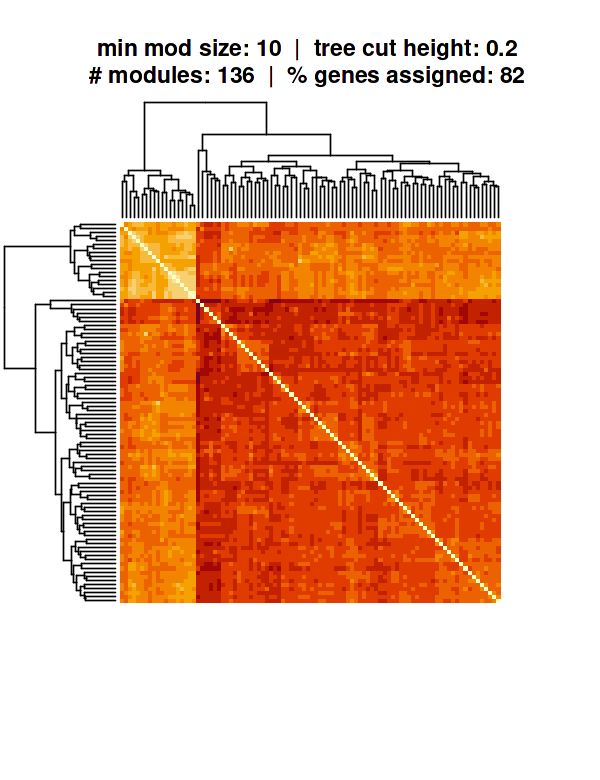

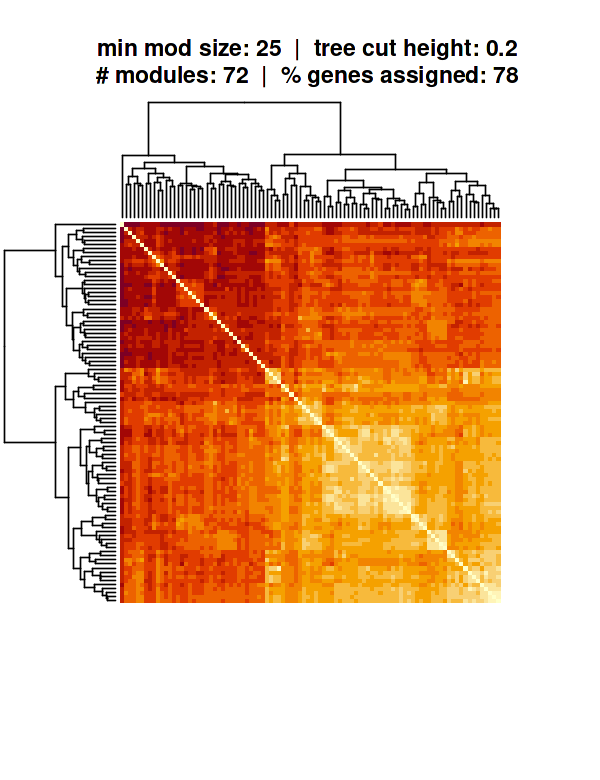

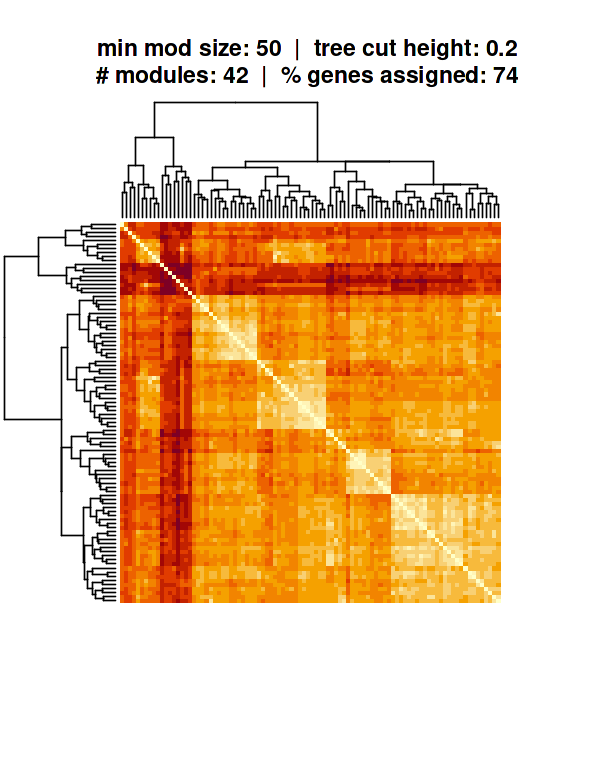

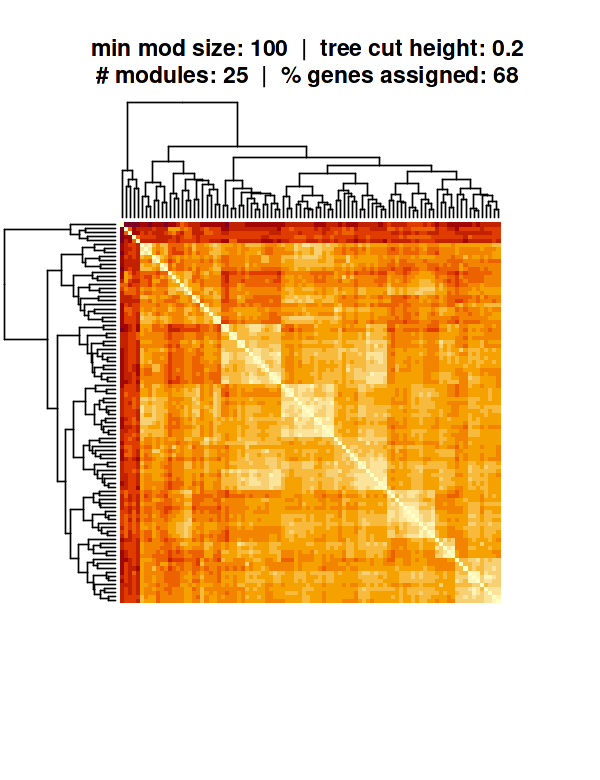

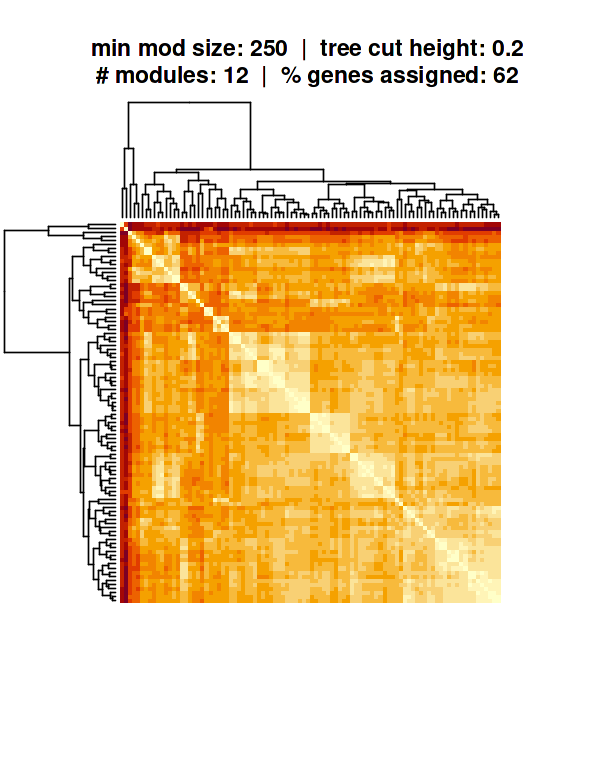

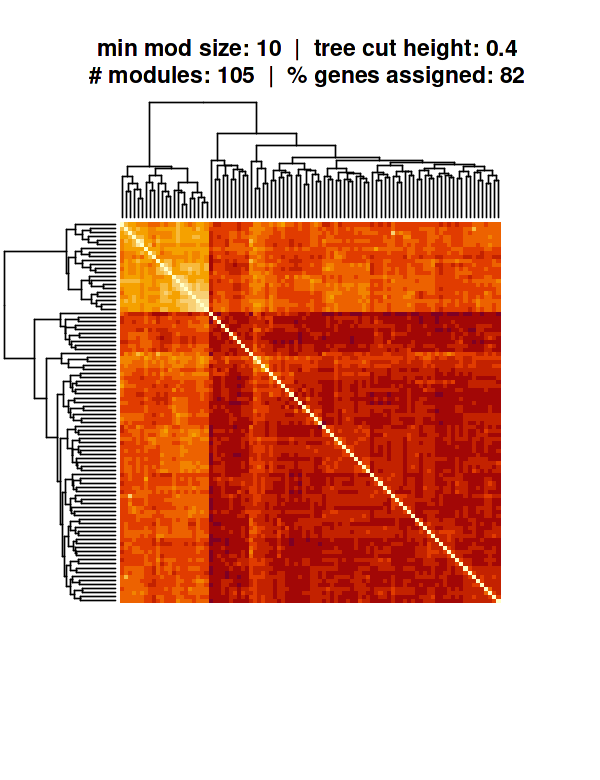

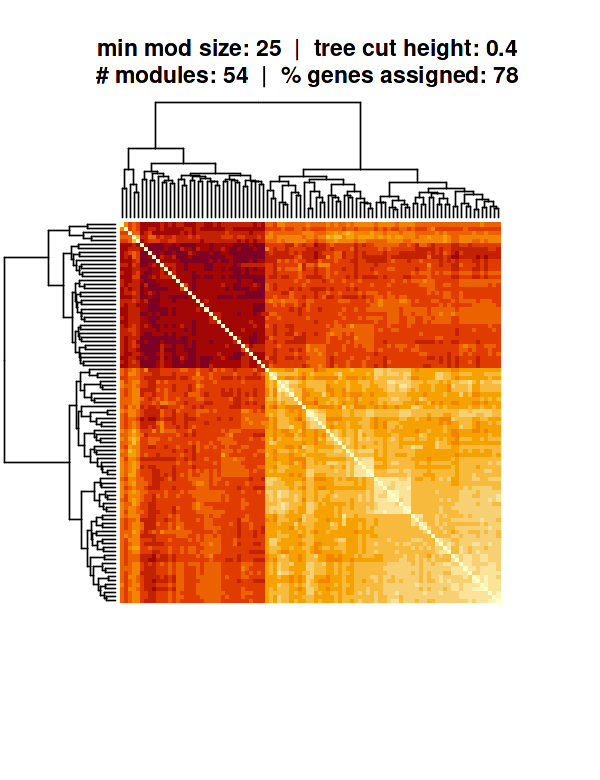

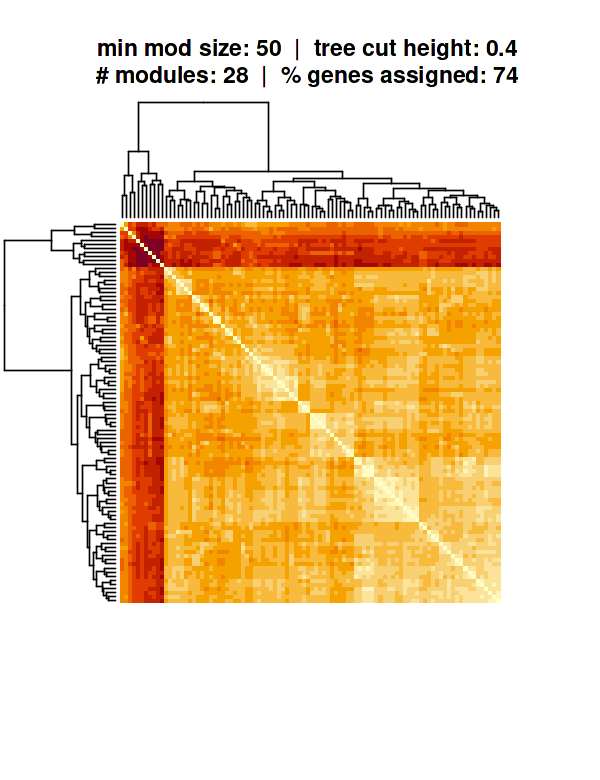

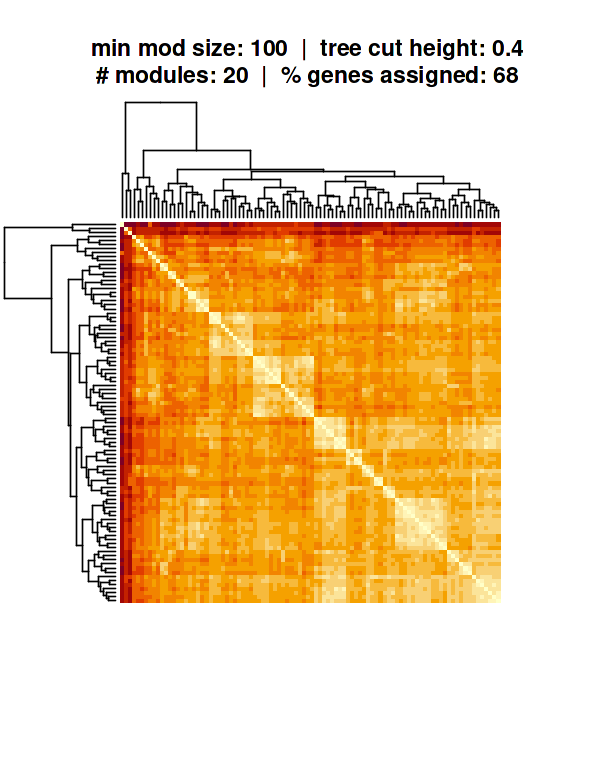

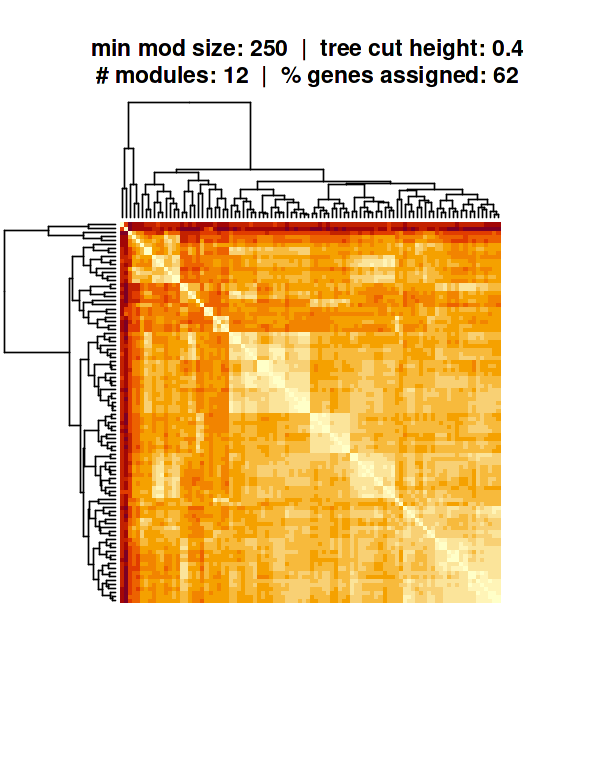

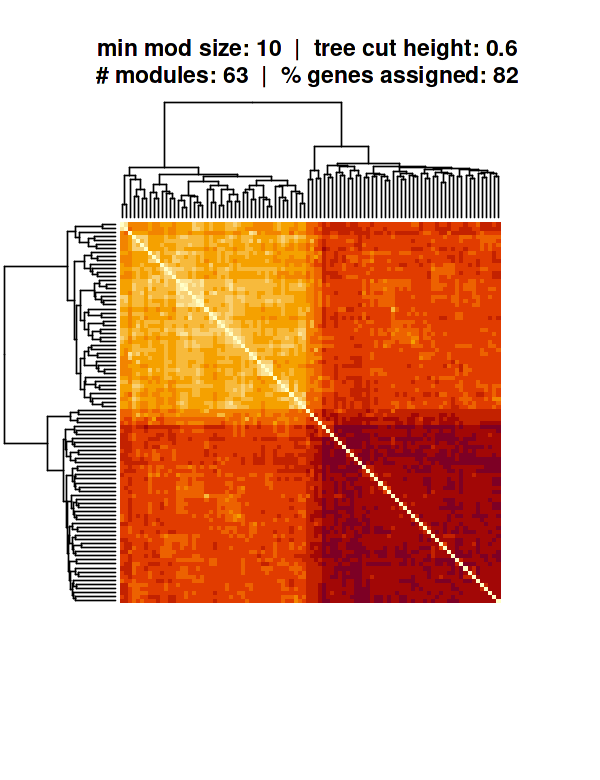

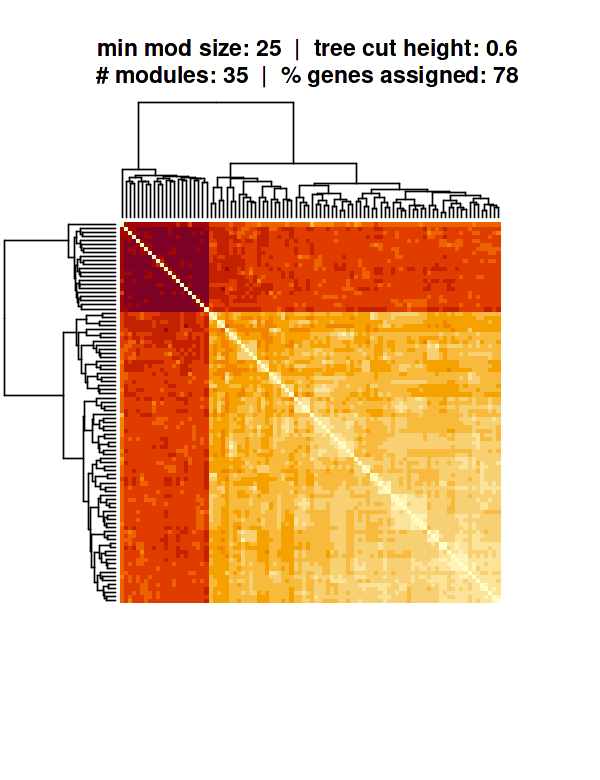

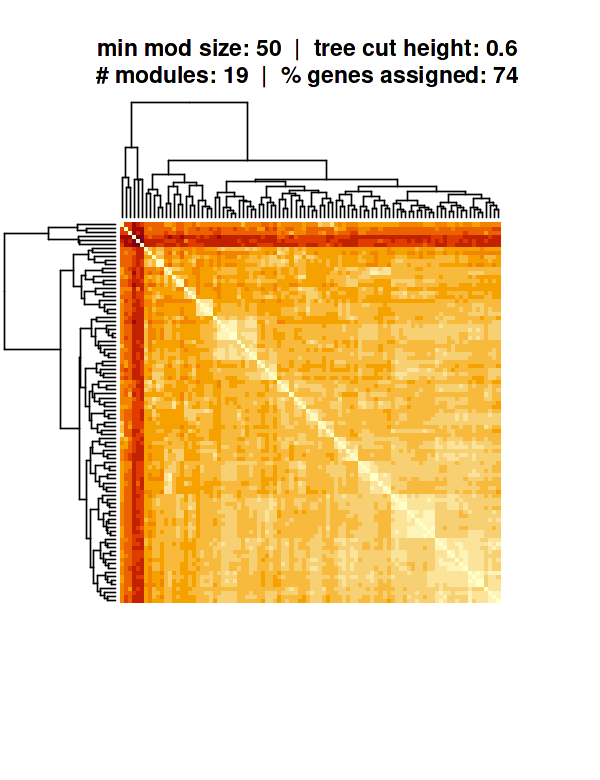

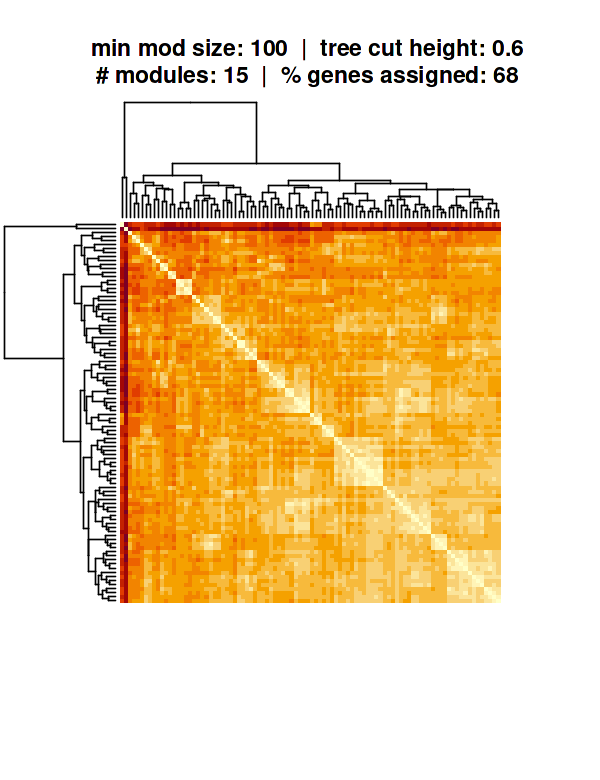

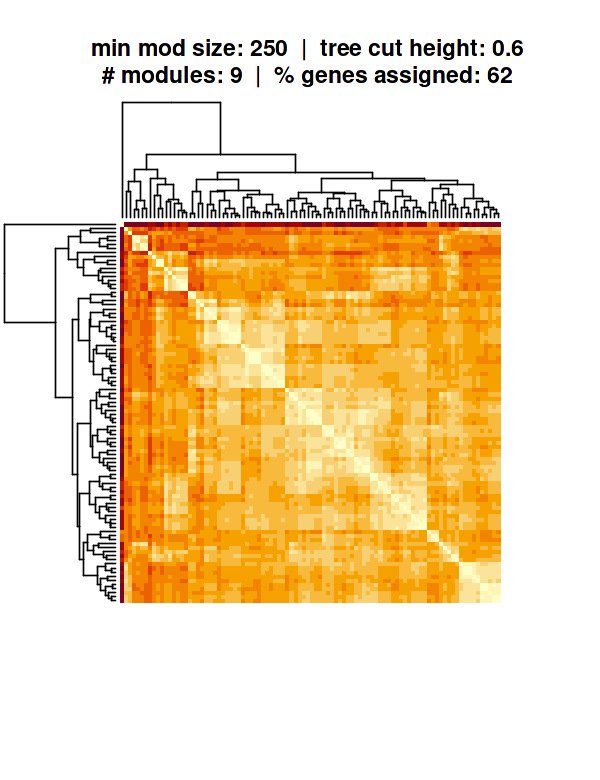

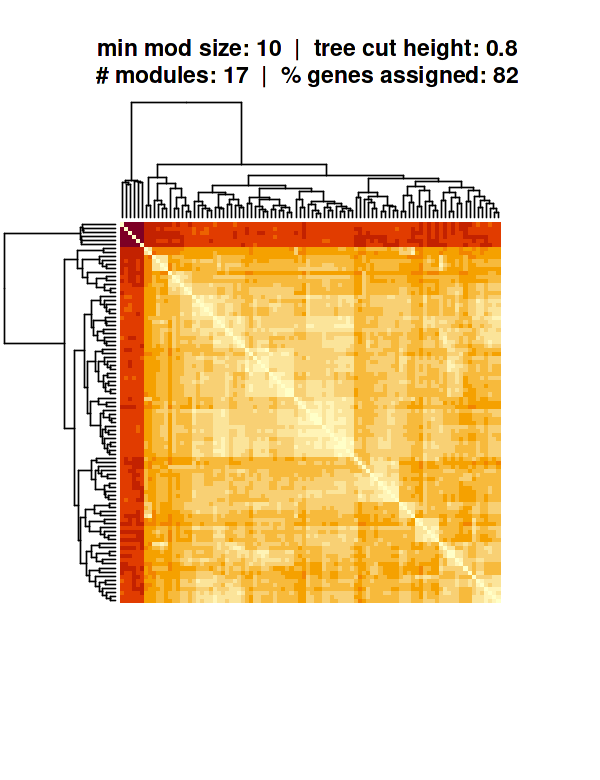

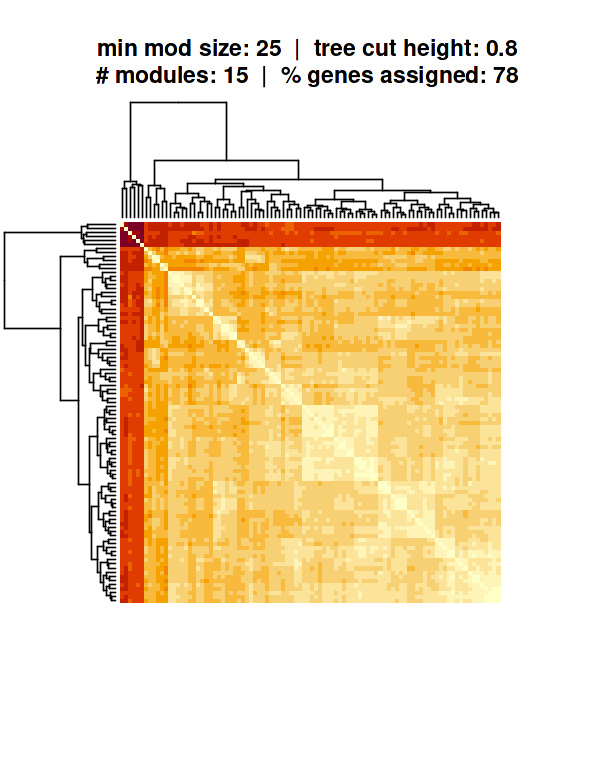

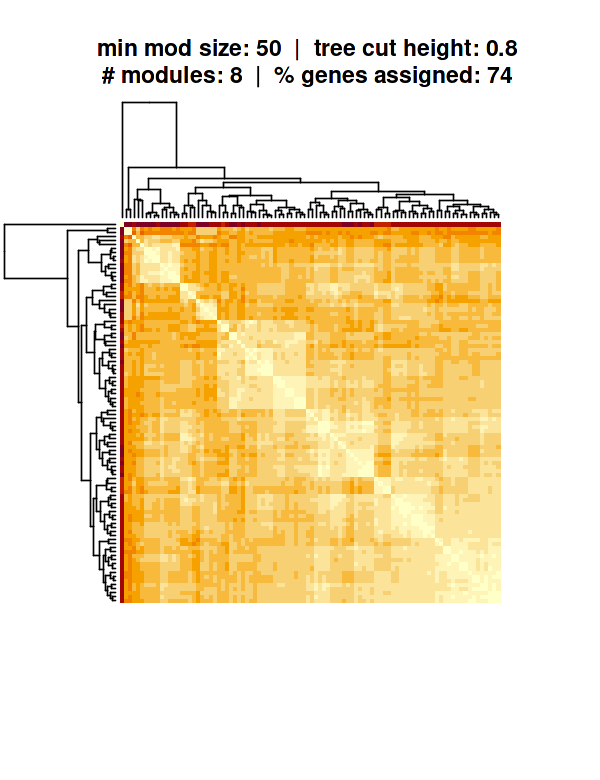

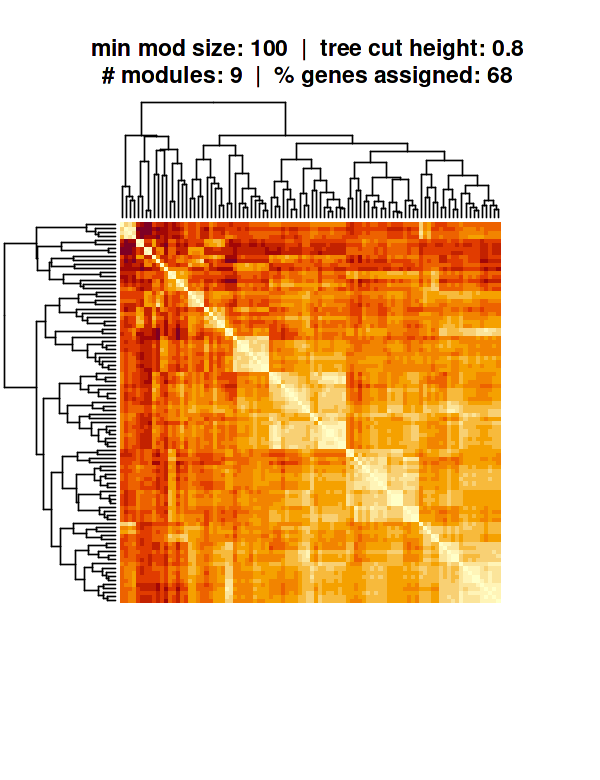

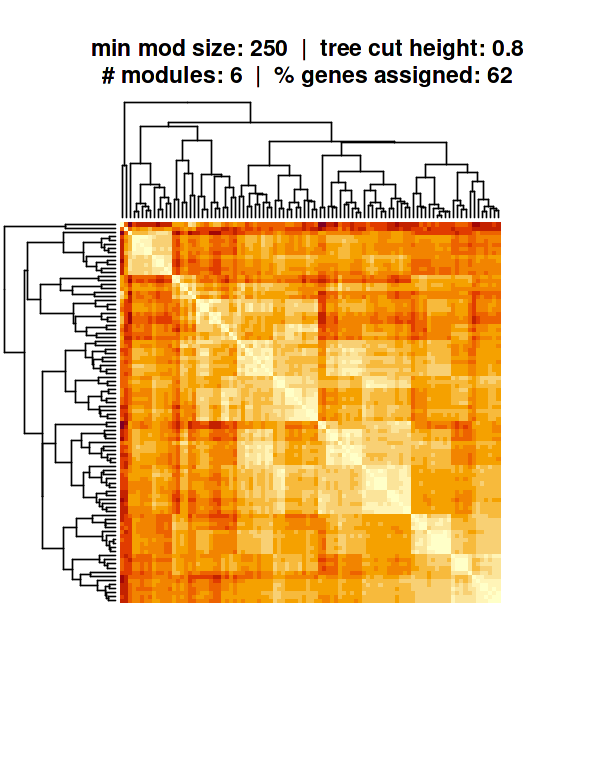

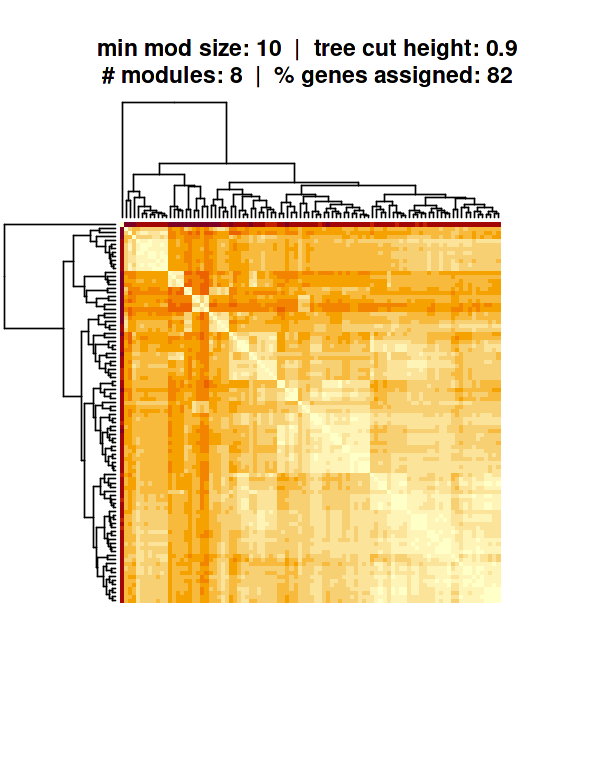

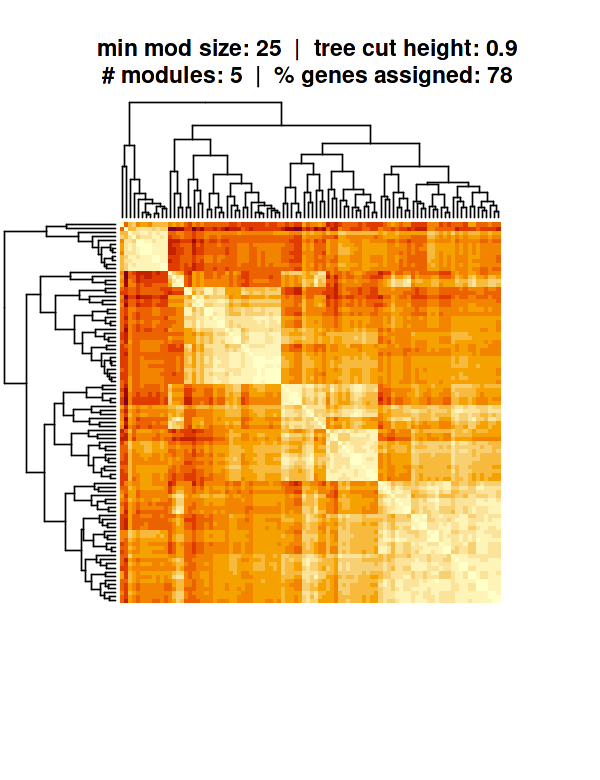

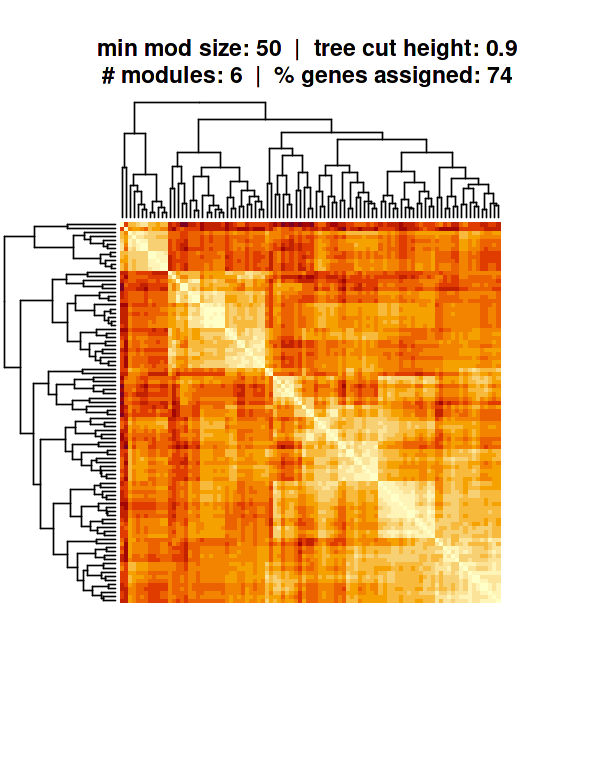

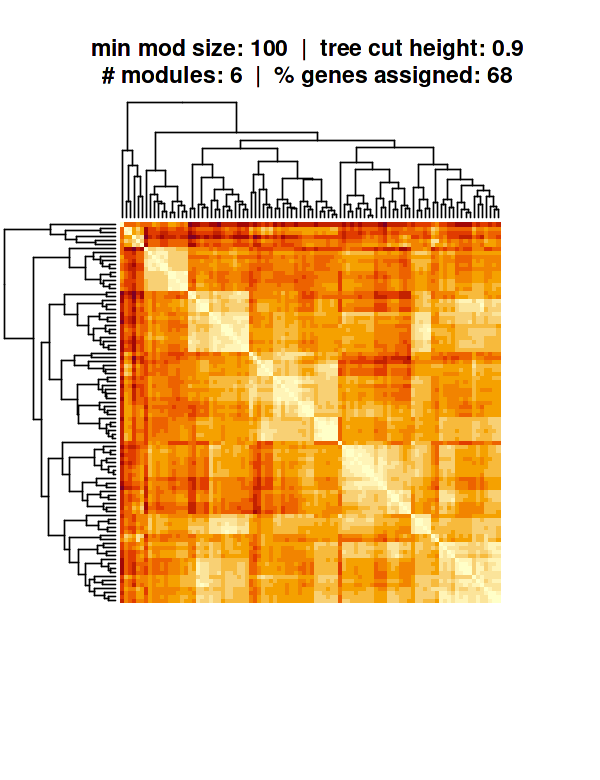

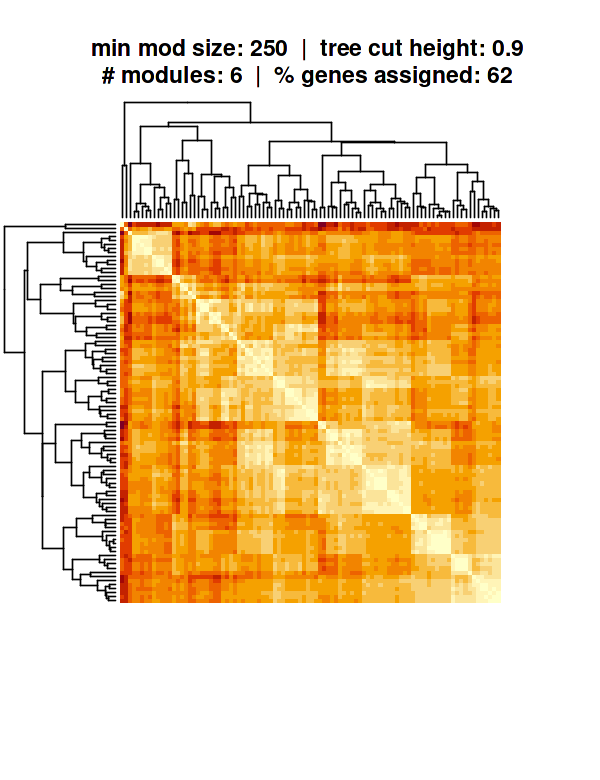

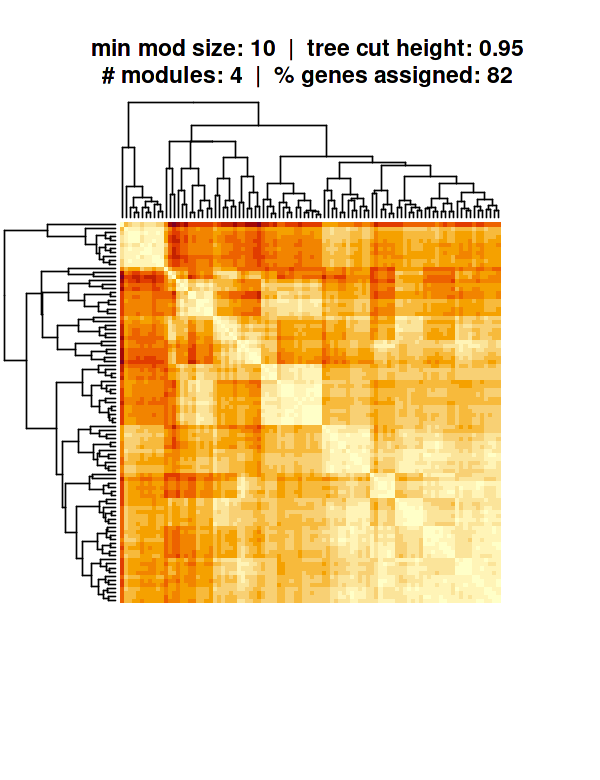

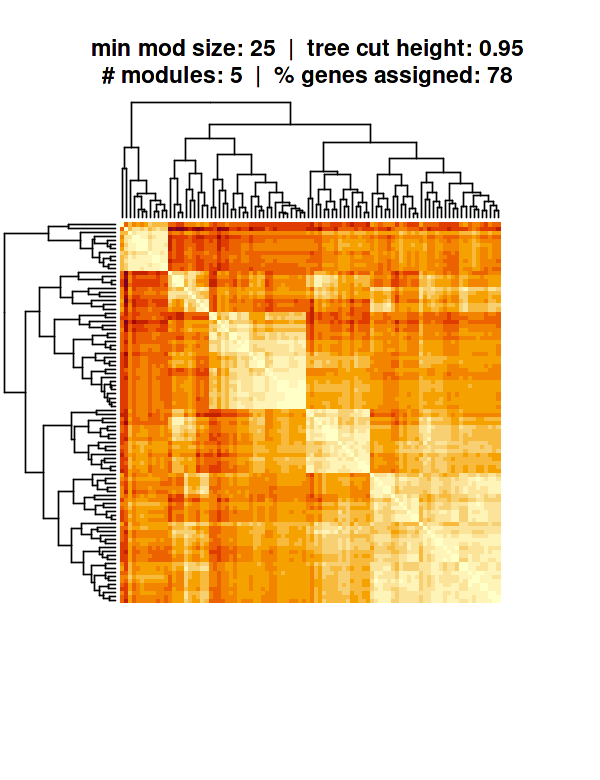

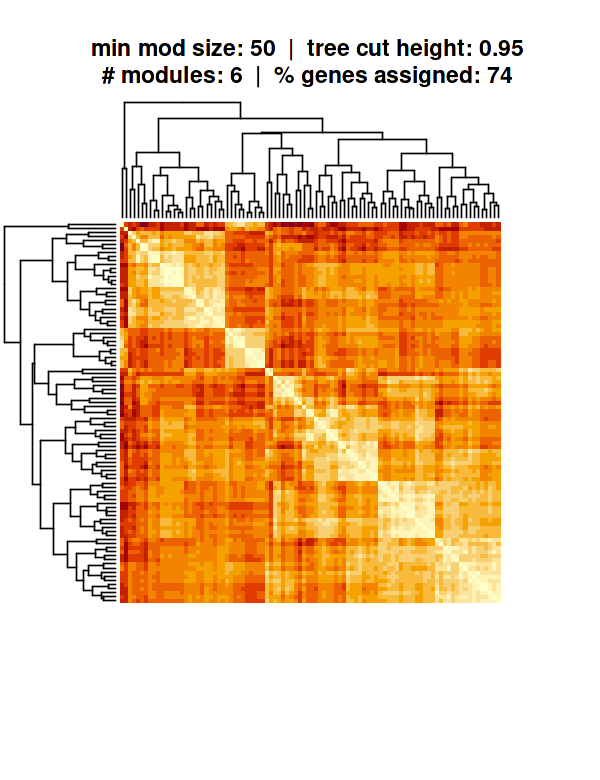

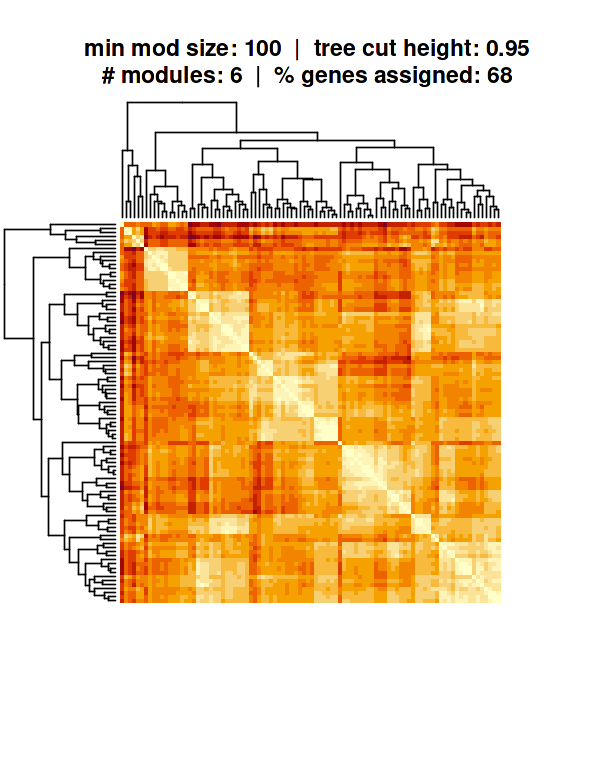

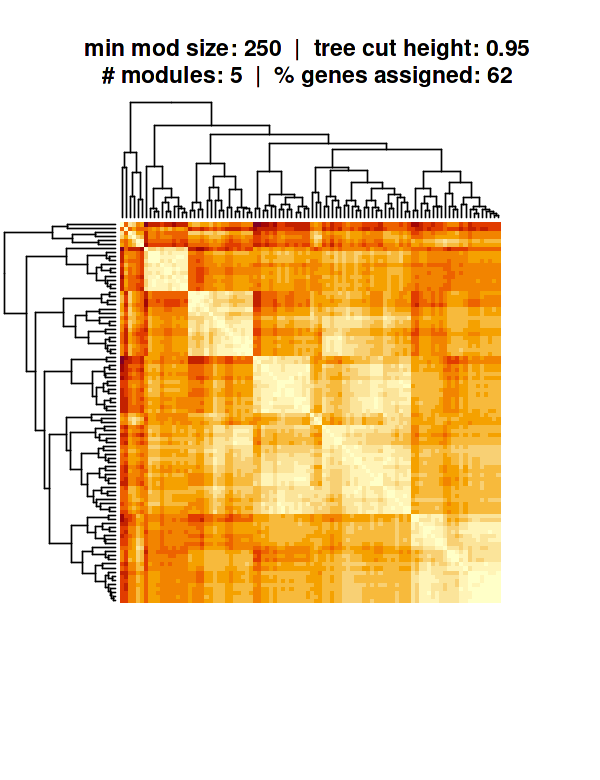

In [5]:
options(repr.plot.width=5, repr.plot.height=6.5)


net_name <- names(nets) %>% lapply(function(net_name){

net<-nets[[net_name]]

mod_counts <- table(net$colors)
    
nmods <- length(mod_counts-1)
perc_assigned <- (1-mod_counts[1]/sum(mod_counts))*100 
tmp <-net$MEs %>% dim #%>% length
labs <- rep('',tmp[1])

params <- strsplit(net_name,'_') %>% unlist
params[2]
par(cex.main=.9)
if (params[3] != '0') {
    #svg(paste('svg_files/figs3_',net_name,'.svg',sep=''),height = 6.5,width = 5)
        heatmap(net$MEs %>% dist %>% data.matrix,scale="none",sym=1,labCol=labs,labRow=labs,
        main= paste('min mod size:', params[1], ' |  tree cut height:',params[2],'\n# modules:',nmods,' |  % genes assigned:',round(perc_assigned),'\n\n'))
    #dev.off()
    
    #heatmap(net$MEs %>% dist %>% data.matrix,scale="none",sym=1,labCol=labs,labRow=labs,
    #main= paste('min mod size:', params[1], ' |  tree cut height:',params[2],'\n# modules:',nmods,' |  % genes assigned:',round(perc_assigned),'\n\n'))
      
    }
})


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
6739 4890 2496 1695 1390  904  691  635  344  221  186  183  148  141  127 

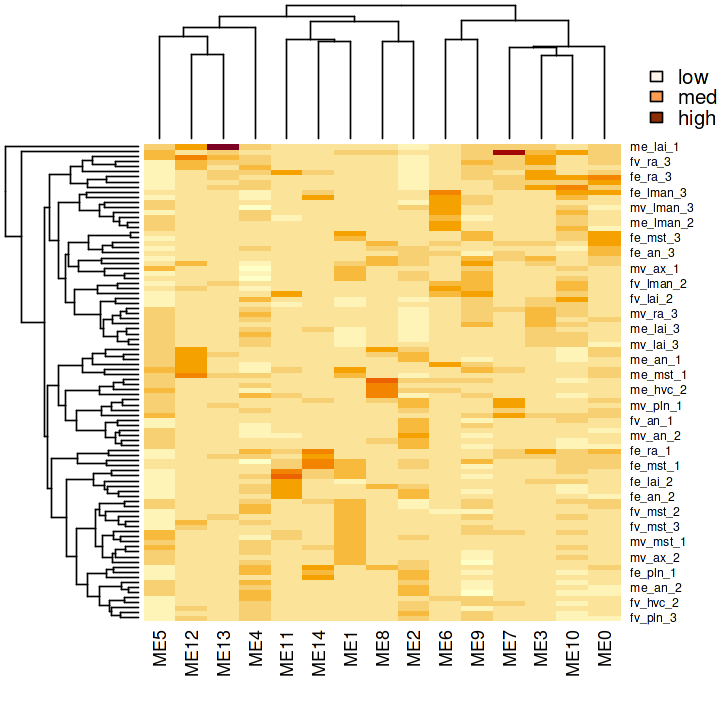

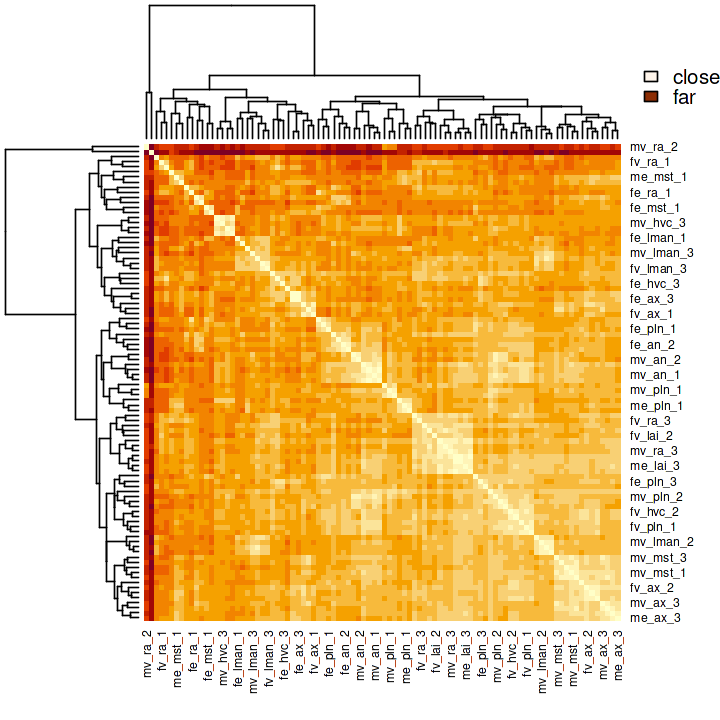

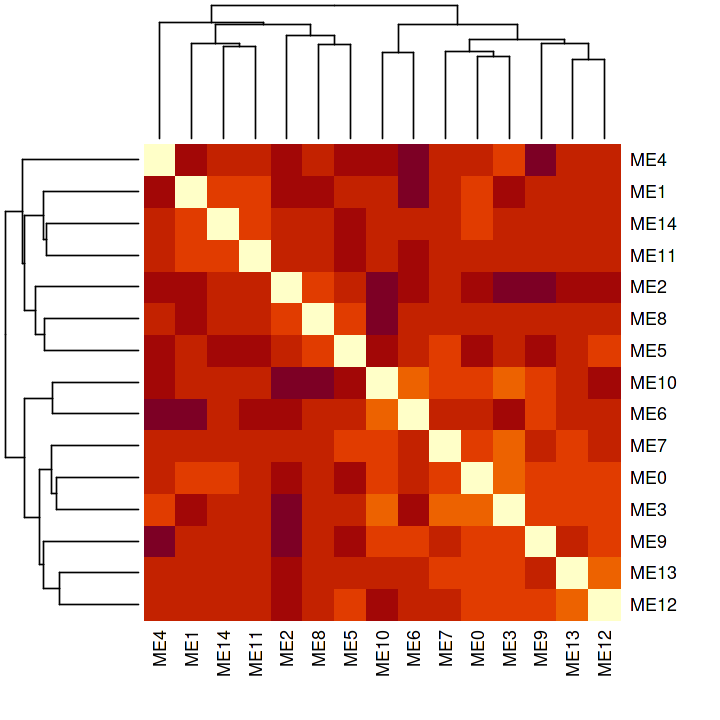

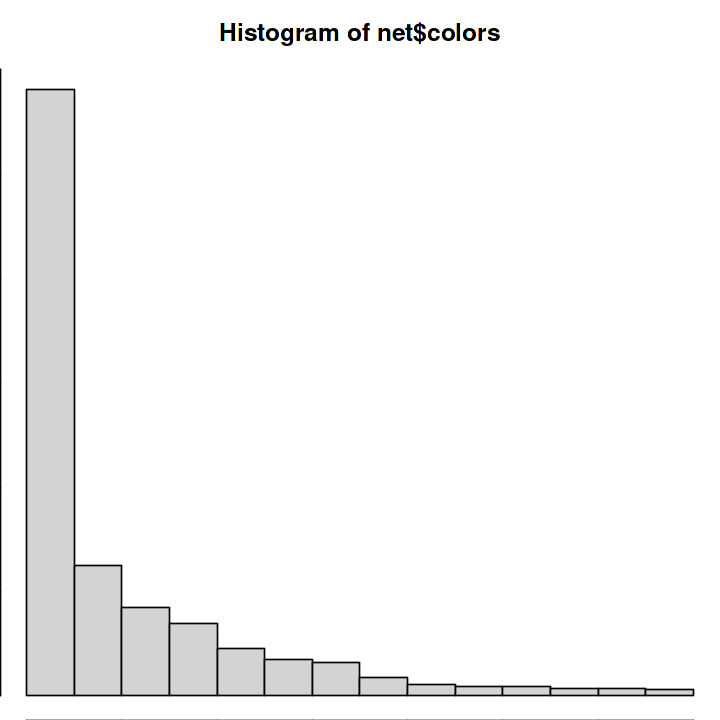

In [6]:
options(repr.plot.width=6, repr.plot.height=6)

net <- nets[['100_0.6_1']]

table(net$colors)

par(mar=c(0, 0, 2.7, 0))
heatmap(net$MEs %>% data.matrix,scale="column")
legend(x='topright', legend=c("low", 'med', "high"),fill=colorRampPalette(RColorBrewer::brewer.pal(8, "Oranges"))(3),bty='n')

heatmap(net$MEs %>% dist %>% data.matrix,scale="none",sym=1)
legend(x='topright', legend=c("close", 'far'),fill=colorRampPalette(RColorBrewer::brewer.pal(8, "Oranges"))(2),bty='n')

heatmap(net$MEs %>% t %>%  dist %>% data.matrix,scale="none",sym=1)

mergedColors = labels2colors(net$colors)

hist(net$colors,
    breaks=length(unique(net$colors)))


### OK I like 100_.6_1, but ME7 and ME13 are clearly fitting ingle samples

In [7]:
net$MEs$ME13 <-NULL
net$MEs$ME7 <- NULL
net$colors[which(net$colors==13)] <-0
net$colors[which(net$colors==7)] <-0
table(net$colors)


   0    1    2    3    4    5    6    8    9   10   11   12   14 
7515 4890 2496 1695 1390  904  691  344  221  186  183  148  127 

### Vis again without the overfit modules

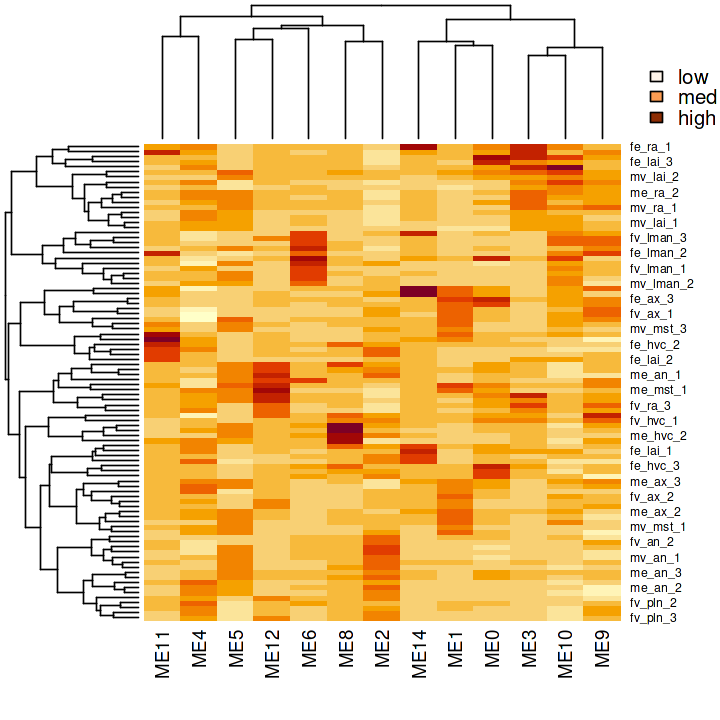

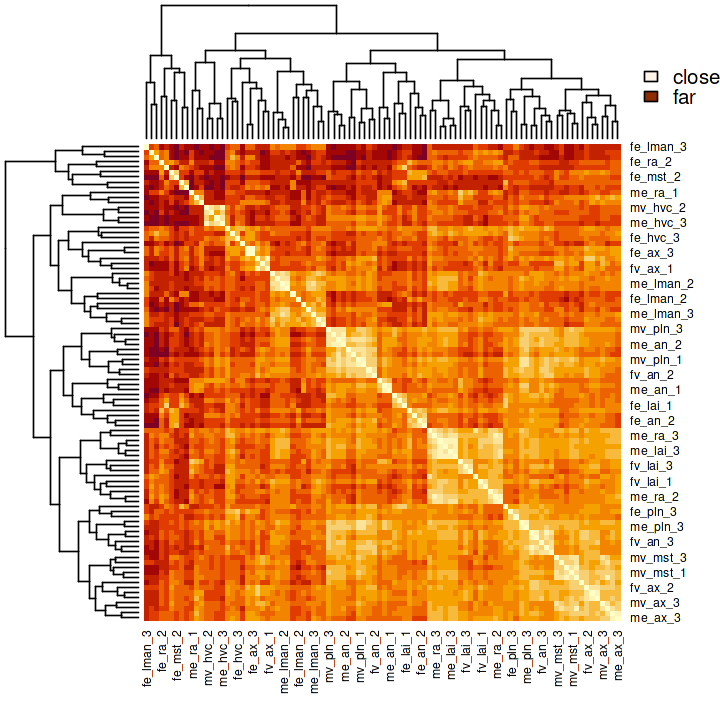

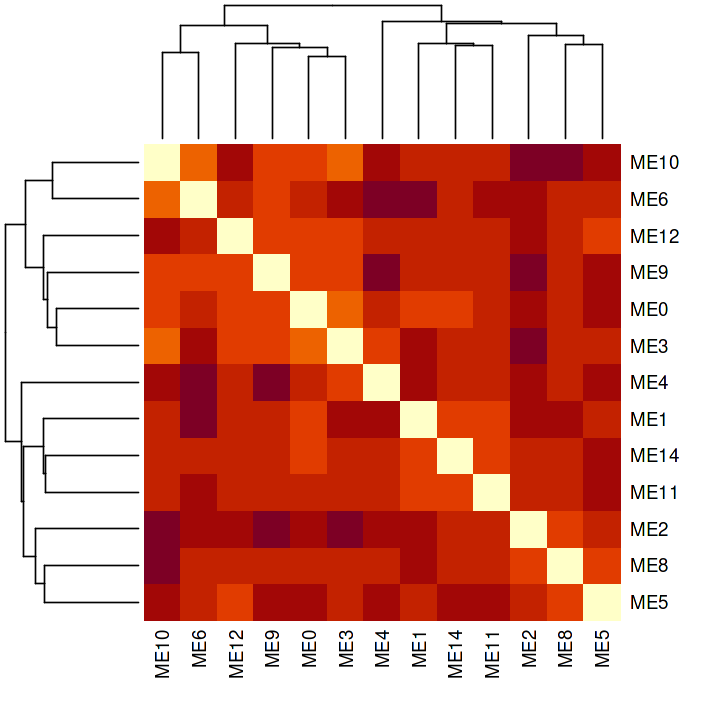

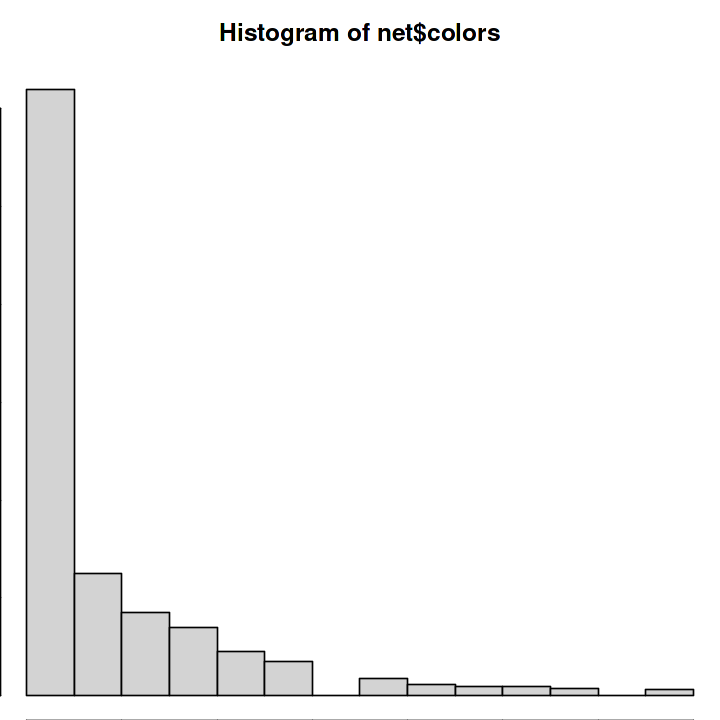

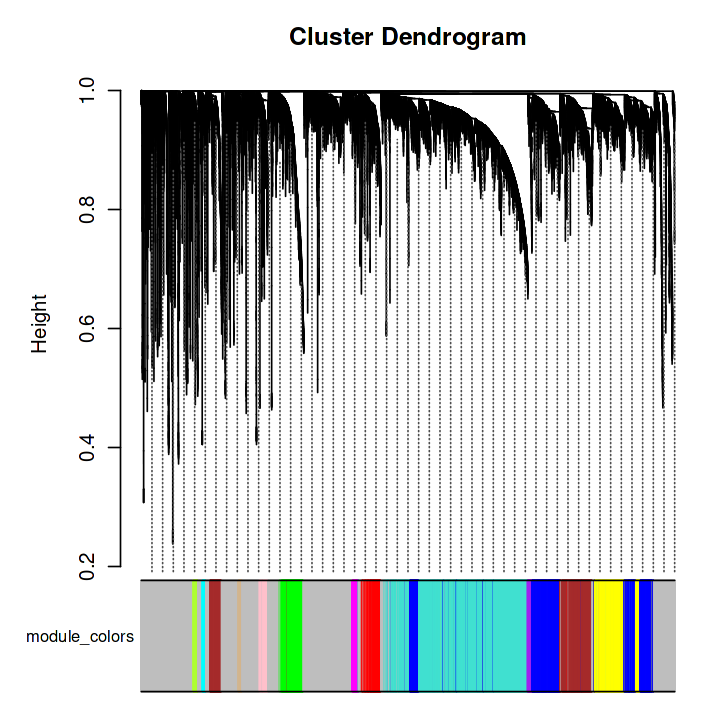

In [8]:
par(mar=c(0, 0, 2.7, 0))
heatmap(net$MEs %>% data.matrix,scale="column")
legend(x='topright', legend=c("low", 'med', "high"),fill=colorRampPalette(RColorBrewer::brewer.pal(8, "Oranges"))(3),bty='n')

heatmap(net$MEs %>% dist %>% data.matrix,scale="none",sym=1)
legend(x='topright', legend=c("close", 'far'),fill=colorRampPalette(RColorBrewer::brewer.pal(8, "Oranges"))(2),bty='n')

heatmap(net$MEs %>% t %>%  dist %>% data.matrix,scale="none",sym=1)

mergedColors = labels2colors(net$colors)

hist(net$colors,
    breaks=length(unique(net$colors)))
    
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(input_data$unrecut_net$dendrograms[[1]], 
    mergedColors[input_data$unrecut_net$blockGenes[[1]]],
    'module_colors',
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)

In [9]:
net$input_data <- input_data

## BEAUTIFUL
## Seems like a good place to save my work

In [10]:
saveRDS(net, '2_wgcna_selected_purged_net_r42_broken_out.rds')

In [11]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.1 LTS

Matrix products: default
BLAS:   /home/mdavenport/bin/R4.2.1/R-4.2.1/lib/libRblas.so
LAPACK: /home/mdavenport/bin/R4.2.1/R-4.2.1/lib/libRlapack.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] WGCNA_1.71            fastcluster_1.2.3     dynamicTreeCut_1.63-1
 [4] forcats_0.5.2         stringr_1.4.1         dplyr_1.0.10         
 [7] purrr_0.3.5           readr_2.1.3           tidyr_1.2.1          
[10] tibble_3.1.8          ggplot2_3.3.6         tidyverse_1.3.2      

loaded via a namespace (and not att